In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
diwali_sales = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-11-14/diwali_sales_data.csv')



Rows: 11251 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Cust_name, Product_ID, Gender, Age Group, State, Zone, Occupation, ...
dbl (5): User_ID, Age, Marital_Status, Orders, Amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
diwali_sales |> head()

User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877


In [13]:
state_summary <- diwali_sales %>%
  group_by(State) %>%
  summarise(Total_Amount = sum(Amount, na.rm = TRUE))

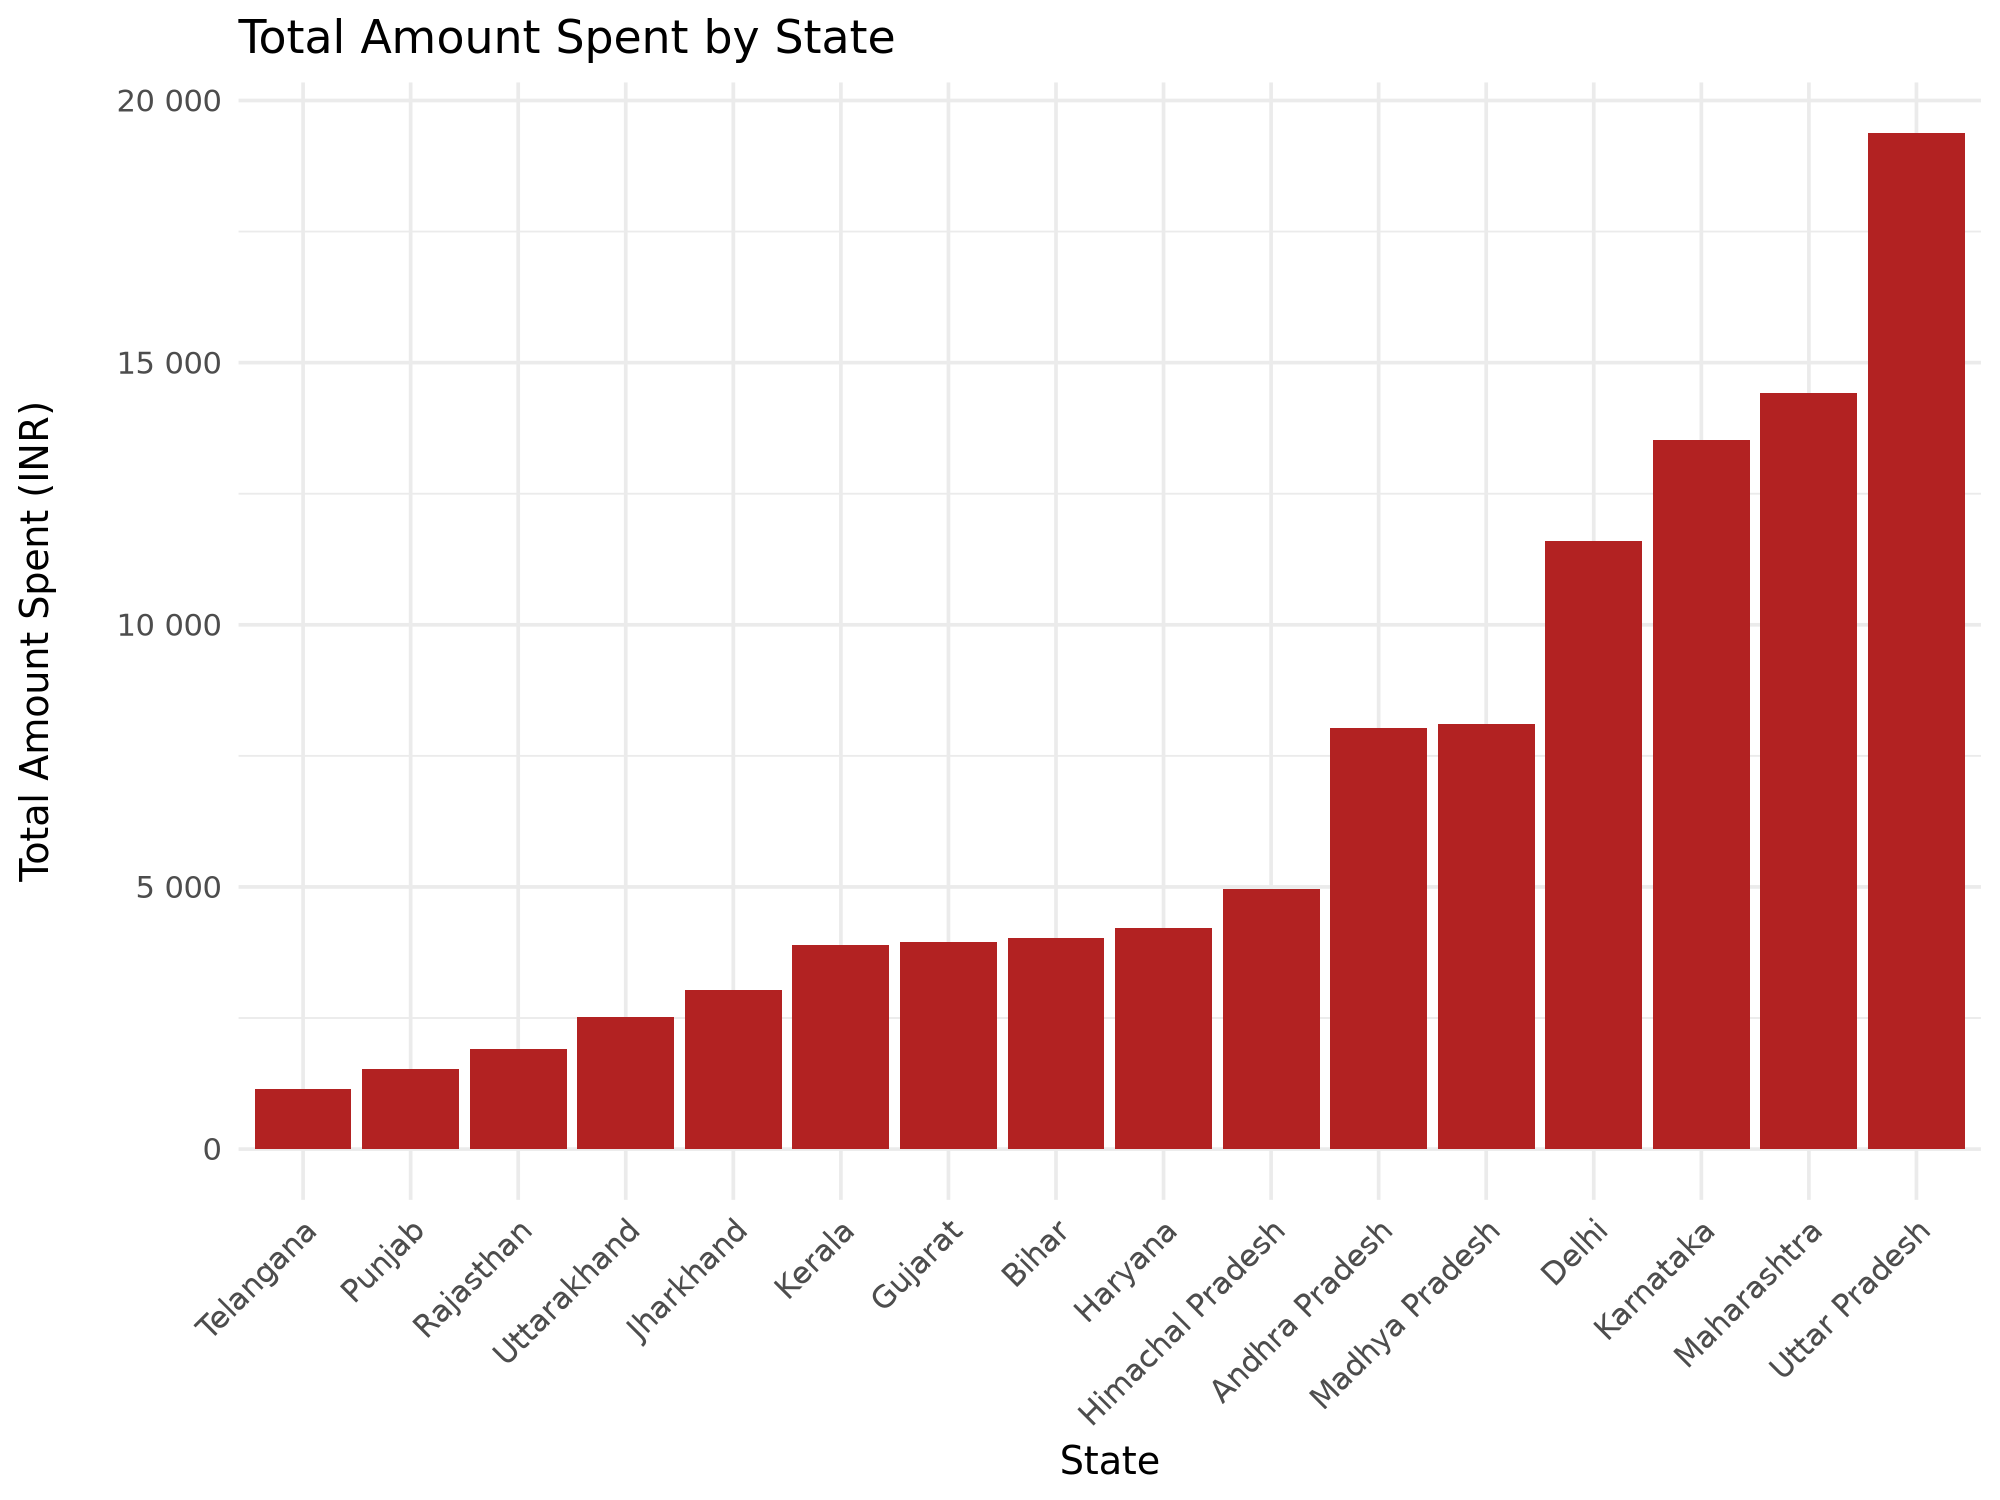

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(state_summary, aes(x = fct_reorder(State, Total_Amount), y = Total_Amount)) +
  geom_bar(stat = "identity", fill = "firebrick") +
  labs(title = "Total Amount Spent by State",
       x = "State",
       y = "Total Amount Spent (INR)") +
  scale_y_continuous(labels = label_number(scale = 0.001)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt"))) +
 scale_fill_viridis_d()
 

The bar graph illustrates the total amount spent across various states. In terms of spending, the top three states that topped with the highest expenditure are Uttar Pradesh, Maharashtra, and Karnataka, out of which Uttar Pradesh is significantly ahead of the other two. Most of these states probably have either a bigger population size or stronger purchasing ability in the Diwali season. On the other hand, states like Telangana and Punjab have relatively low total spending, potentially attributed to less populous demographics or limited involvement in the shopping behavior witnessed during Diwali.

There is a clear trend of how spending differs by state. Other states, however, fall into the mid-range of spending such as Delhi and Madhya Pradesh; they strike a balance between purchasing power and population size. The stark differences among states could reflect regional economic dissimilitude, diverse cultural practices associated with shopping for Diwali, or differences in urbanization shaping consumer behavior.

In [76]:
gender_age_summary <- diwali_sales %>%
  group_by(Gender, `Age Group`) %>%
  summarise(Total_Amount = sum(Amount, na.rm = TRUE))

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


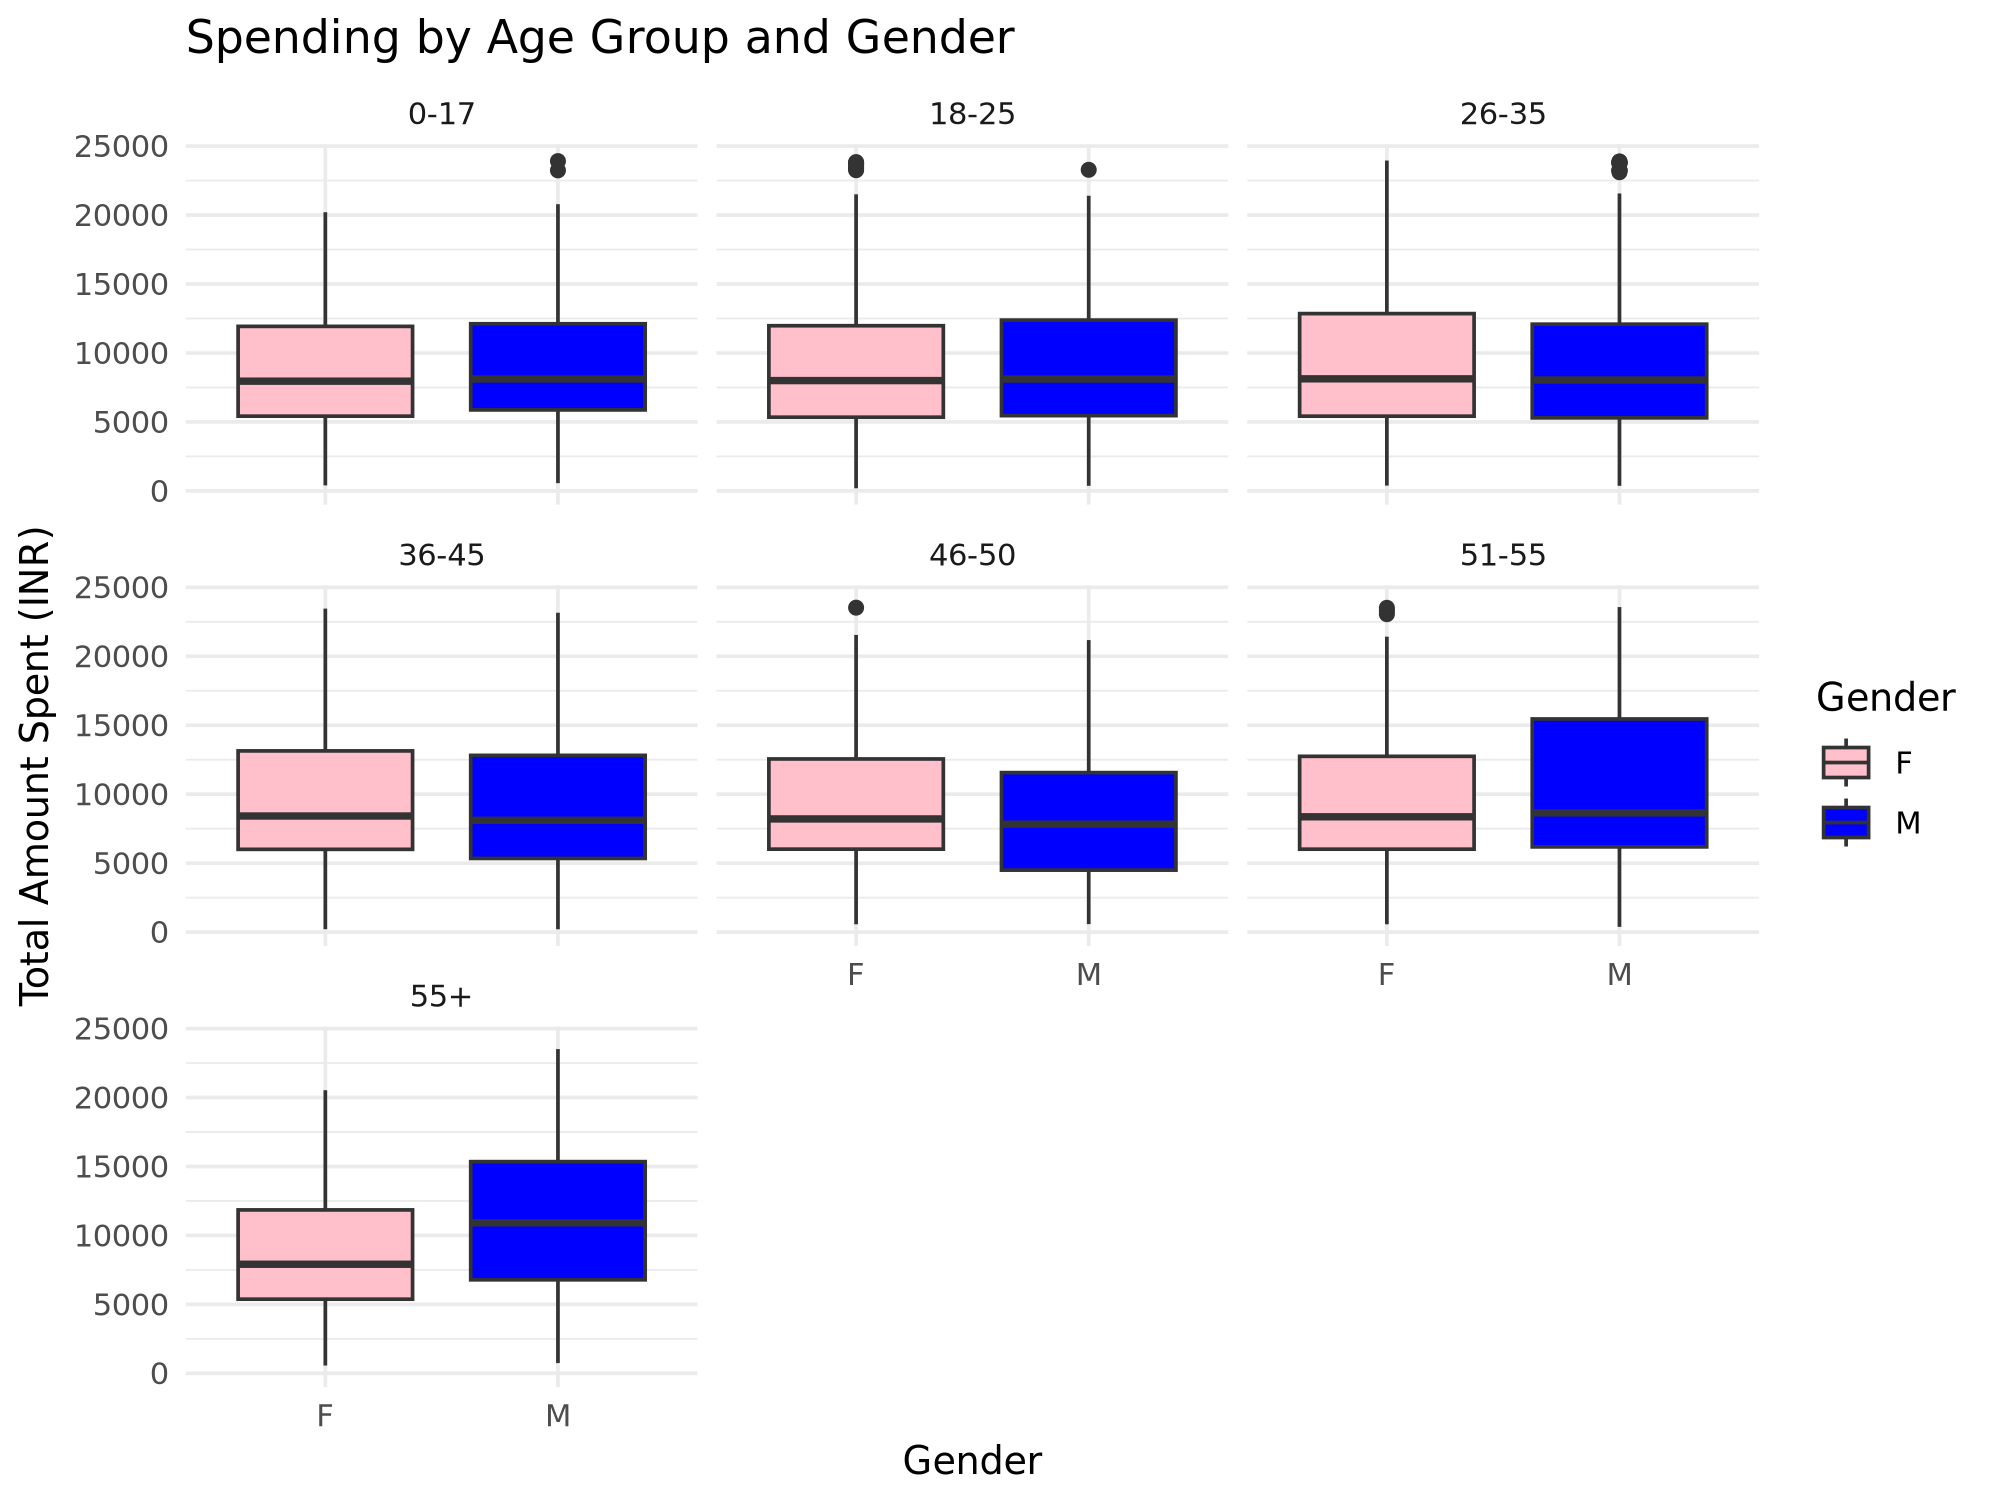

In [23]:
ggplot(diwali_sales, aes(x = Gender, y = Amount, fill = Gender)) +
  geom_boxplot(na.rm = TRUE) +
  labs(
    title = "Spending by Age Group and Gender",
    x = "Gender",
    y = "Total Amount Spent (INR)"
  ) +
  scale_fill_manual(values = c("pink", "blue")) +
  facet_wrap(~ `Age Group`) +
  theme_minimal()

This box plot, divided into facets for each age group, highlights the spending distribution across genders. Spending patterns for males and females show considerable overlap across most age groups, with medians often being very close. Nevertheless, some age groups vary slightly. For example, the median expenditure for males in the 51-55 age group is slightly above that of females, while younger groups such as the 0-17 and the 18-25 age groups tend to have equal medians.

Heights of the boxes and outliers show the variation in each gender/age group. The outliers represent individuals who spent significantly more than others in their age group, suggesting occasional high-value purchases during Diwali. In other words, there is slightly more variability in what they spend in younger groups (e.g., 18-25 and 26-35), which could suggest that the people in those groups have different spending habits, disposable income levels, or they shop at more expensive places. The older ones show even tighter spending distributions, indicating that their purchasing behavior is becoming more habitual.

occupation_summary <- diwali_sales %>%
  group_by(Occupation) %>%
  summarise(Total_Amount = sum(Amount, na.rm = TRUE))


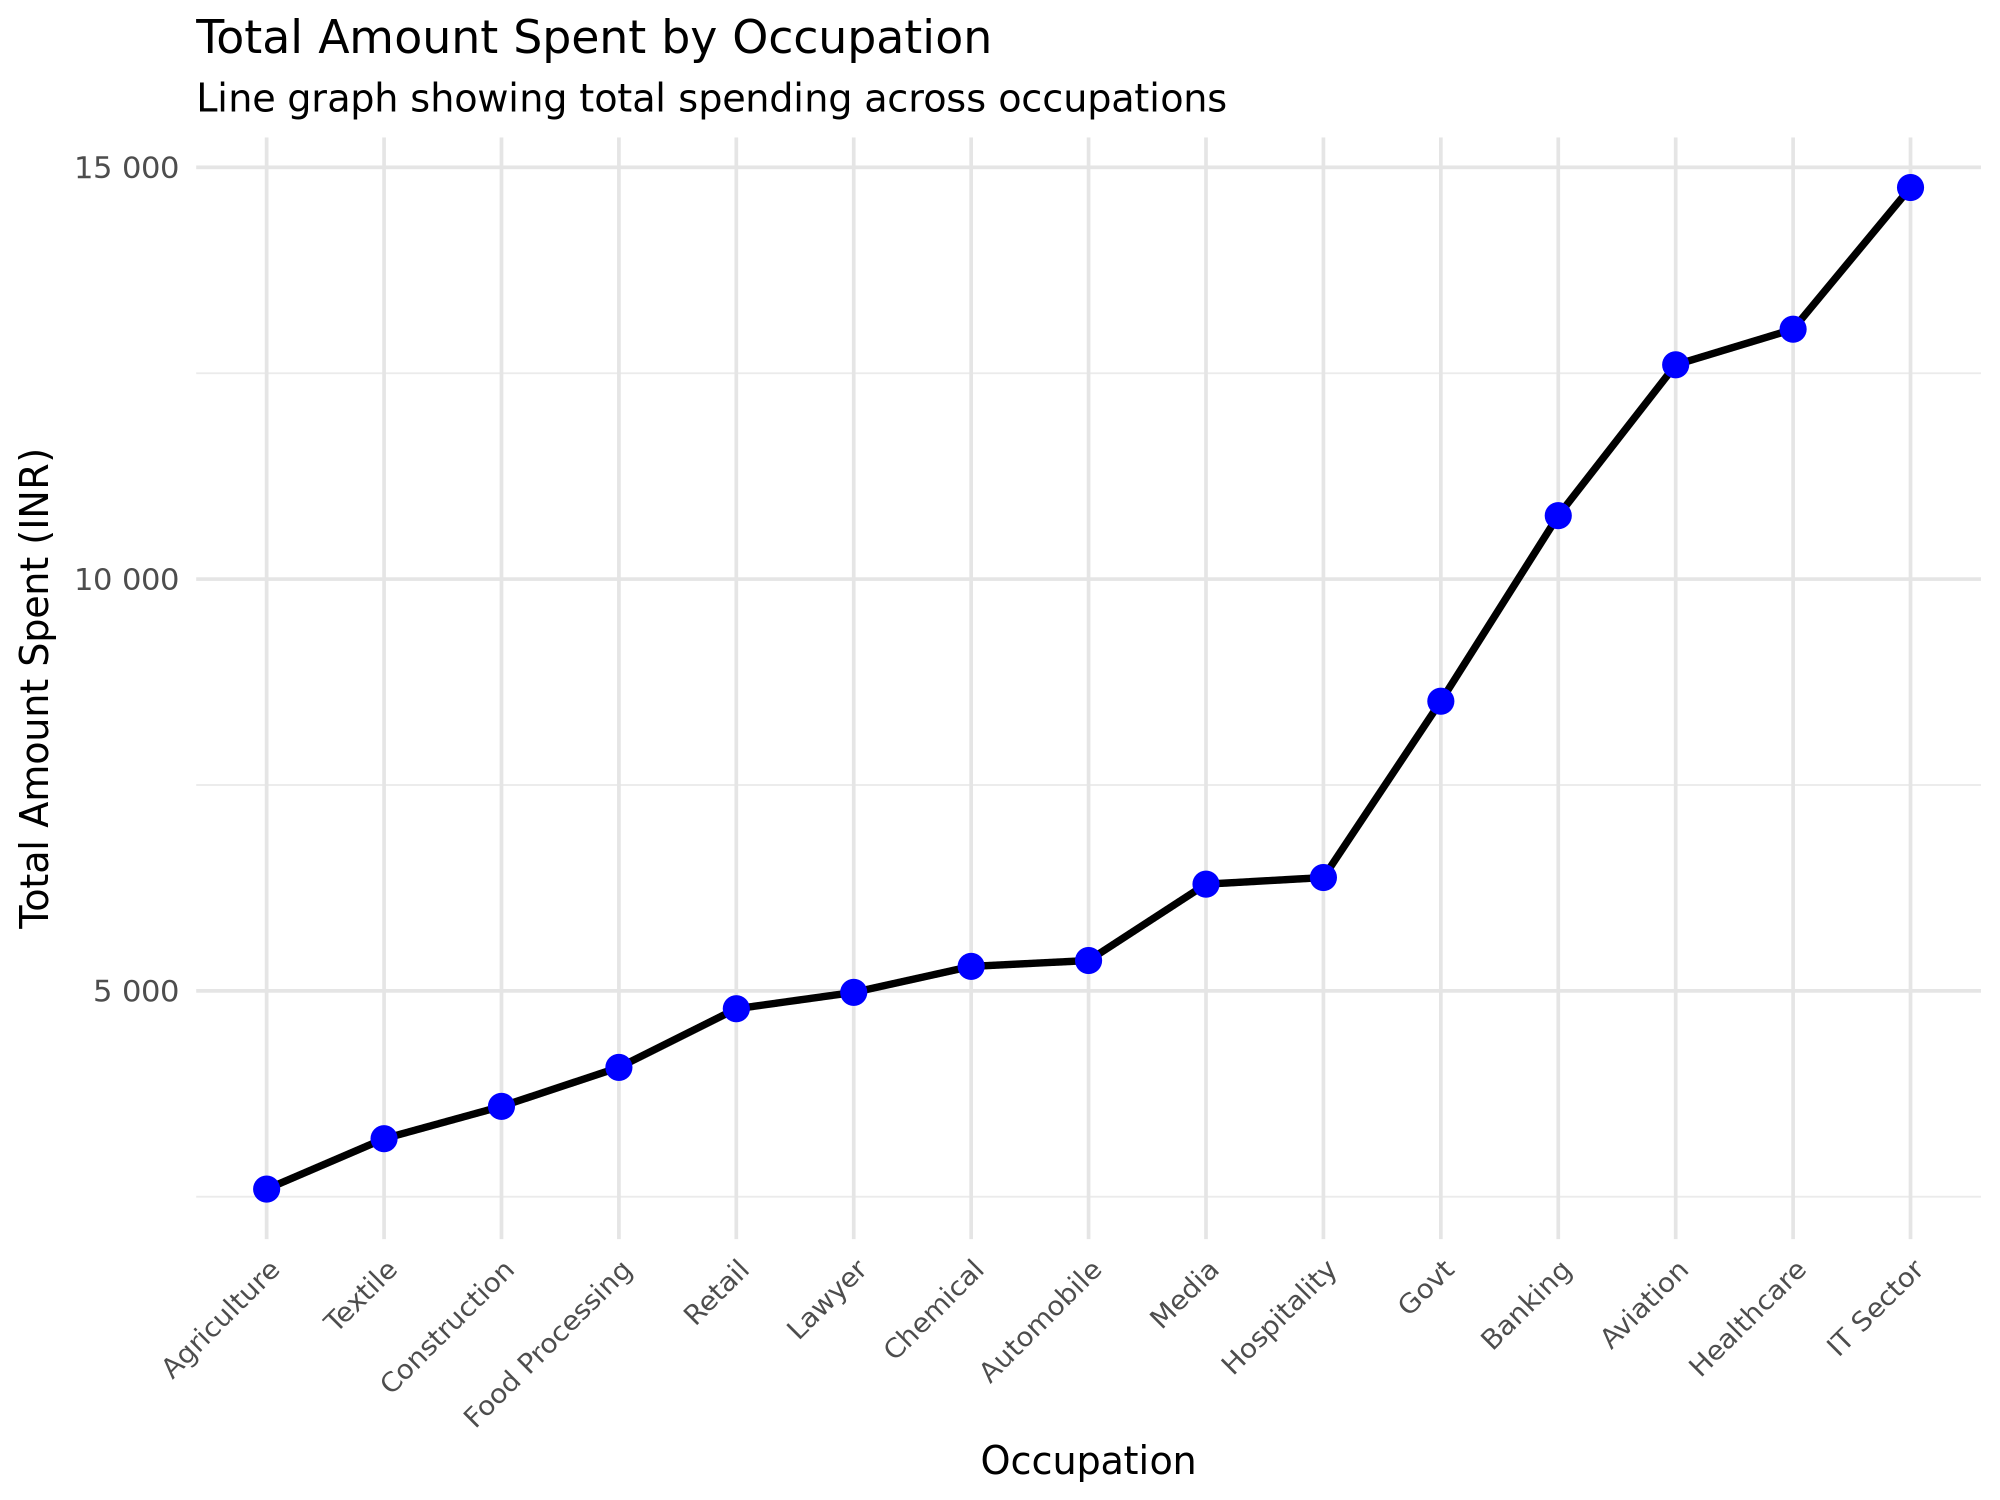

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(occupation_summary, aes(x = reorder(Occupation, Total_Amount), y = Total_Amount, group = 1)) +
  geom_line(color = "black", size = 1) +
  geom_point(color = "blue", size = 3) +
  labs(
    title = "Total Amount Spent by Occupation",
    subtitle = "Line graph showing total spending across occupations",
    x = "Occupation",
    y = "Total Amount Spent (INR)"
  ) +
  scale_y_continuous(labels = label_number(scale = 0.001)) + 
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    panel.grid.major = element_line(color = "gray90")
  )

The line graph shows the amount spent separately for each occupation, and the trend is a clear upward from Agriculture to the IT Sector. With the highest spending across the board, IT Sector, Healthcare, and Aviation professions lead the chart, which shows that professionals in these industries may have higher disposable income that allows them to splurge more during the festive season. Conversely, sectors including Agriculture, Textile, and Construction exhibit minimal expenditure, indicative of either reduced income potential or alternative priorities during the Diwali celebration period.

The line progressively sloping up indicates a good relationship between profession and total spending. The average middle-income industries — Retail, Chemical, and Media — spend at an appropriate level according to their expected income ranges. This graph highlights the economic differences between professions and their effect pull on consumer behavior, especially during a culturally significant time such as Diwali!